In [1]:
import cv2
import matplotlib.pyplot as plt


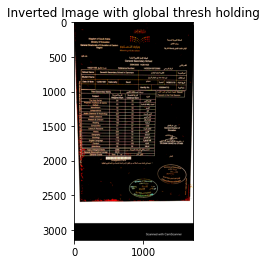

In [2]:
image= "Page_1.jpg"
img = cv2.imread(image)
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()


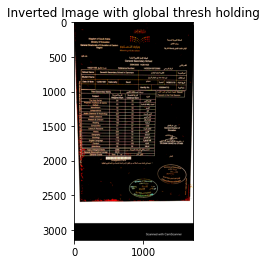

In [7]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

In [16]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,220, cv2.THRESH_OTSU)


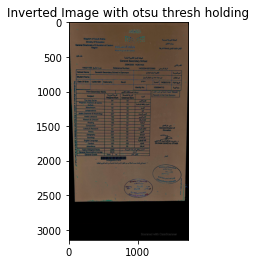

In [17]:
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

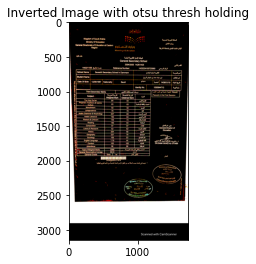

In [20]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,200,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [21]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [23]:
import numpy as np
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
eroded_image = cv2.erode(img_bin2, vertical_kernel, iterations=5)
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)

In [24]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
image_2 = cv2.erode(img_bin, hor_kernel, iterations=5)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=5)

In [25]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)

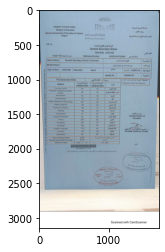

In [27]:
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255,200, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image = cv2.bitwise_not(cv2.bitwise_xor(img,vertical_horizontal_lines))
plotting = plt.imshow(b_image,cmap='gray')
plt.show()

In [28]:
import pytesseract

In [32]:
h, w = vertical_horizontal_lines.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)

In [37]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [38]:
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
key=lambda x:x[1][1]))

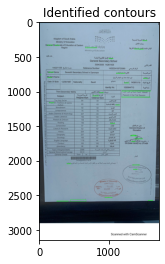

In [39]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [40]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)

102.93442622950819
Rows
[[1490, 265, 65, 8]]
[[116, 329, 82, 8], [230, 331, 65, 6], [667, 364, 165, 11], [1371, 385, 75, 8], [1447, 389, 56, 6]]
[[1004, 525, 64, 6]]
[[139, 720, 71, 7], [1112, 736, 59, 8], [1177, 737, 58, 7], [0, 752, 31, 14], [126, 797, 58, 6], [1500, 809, 63, 8]]
[[1227, 874, 66, 9]]
[[1192, 989, 410, 13], [868, 1016, 59, 7], [774, 1062, 84, 9], [1189, 1079, 409, 12]]
[[145, 1162, 71, 6], [1102, 1193, 59, 8]]
[[1026, 1459, 66, 9]]
[[1331, 1630, 61, 6], [1315, 1638, 93, 8], [1378, 1679, 113, 10], [1329, 1720, 56, 7]]
[[400, 2042, 60, 6], [1345, 2058, 101, 9]]
[[1357, 2124, 58, 6]]
[[948, 2529, 104, 7], [450, 2563, 227, 26], [1568, 2571, 72, 7], [256, 2580, 165, 10]]


In [41]:
total_cells=0
for i in range(len(row)):
    if len(row[i]) > total_cells:
        total_cells = len(row[i])
print(total_cells)

4


In [42]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)
center=np.array(center)
center.sort()
print(center)

[174, 1141, 1206, 15, 155, 1531]
[  15  155  174 1141 1206 1531]


In [46]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        # print(indexing)
        l.append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
    print(box)

[[], [], [], [], [1490, 265, 65, 8]]
[[], [], [], [], [116, 329, 82, 8], [230, 331, 65, 6], [667, 364, 165, 11], [1371, 385, 75, 8], [1447, 389, 56, 6]]
[[], [], [], [], [1004, 525, 64, 6]]
[[], [], [], [], [139, 720, 71, 7], [1112, 736, 59, 8], [1177, 737, 58, 7], [0, 752, 31, 14], [126, 797, 58, 6], [1500, 809, 63, 8]]
[[], [], [], [], [1227, 874, 66, 9]]
[[], [], [], [], [1192, 989, 410, 13], [868, 1016, 59, 7], [774, 1062, 84, 9], [1189, 1079, 409, 12]]
[[], [], [], [], [145, 1162, 71, 6], [1102, 1193, 59, 8]]
[[], [], [], [], [1026, 1459, 66, 9]]
[[], [], [], [], [1331, 1630, 61, 6], [1315, 1638, 93, 8], [1378, 1679, 113, 10], [1329, 1720, 56, 7]]
[[], [], [], [], [400, 2042, 60, 6], [1345, 2058, 101, 9]]
[[], [], [], [], [1357, 2124, 58, 6]]
[[], [], [], [], [948, 2529, 104, 7], [450, 2563, 227, 26], [1568, 2571, 72, 7], [256, 2580, 165, 10]]


In [59]:
def bit_not(n, numbits=16):
    return (1 << numbits) - 1 - n

In [60]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                print("result of k ", k)
                y,x,w,h = boxes_list[k][0],boxes_list[k][1], boxes_list[k][2],boxes_list[k][3]
                x = x+h
                y = y+w
                n = (x,y)
                roi = bit_not(n)
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
        dataframe_final.append(s)
print(dataframe_final)

result of k  0


ValueError: invalid literal for int() with base 10: 'n'